# Using Softmax Probabilies to Gauge Uncertainty

Here we attempt to illustrate how interpreting the 'probabilities' output by a softmax function can lead to over-confident predictions/classifications. The aim is to motivate the need for uncertainty quatification techniques in machine learning.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LogisticRegression

## Generate Categorical Data

In [2]:
a = np.array([[10, 0]]) + 1.2 * np.random.randn(50, 2)
b = np.array([[6, 0]]) + 1.5 * np.random.randn(50, 2)
c = np.array([[10, 10]]) + 0.5 * np.random.randn(50, 2)
X = np.concatenate( (a, b, c) )
y = np.concatenate( (0 * np.ones(50), 
                     1 * np.ones(50), 
                     2 * np.ones(50)) )

## A Look at the Data

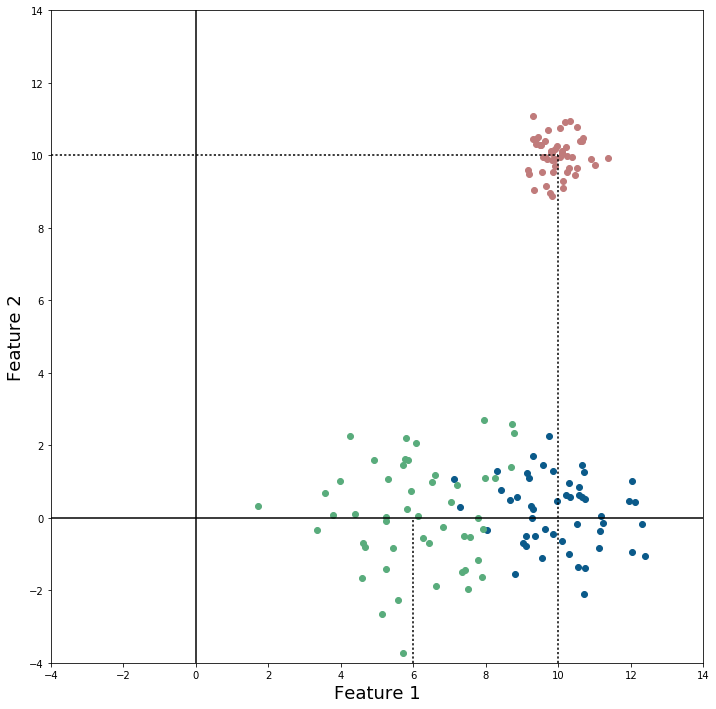

In [3]:
fig, ax = plt.subplots(figsize=(16, 12))

# add x and y axes to the plot
ax.vlines([0], -4, 14, linestyles='solid')
ax.hlines([0], -4, 14, linestyles='solid')

ax.vlines([10, 6], [-4, -4], [10, 0], linestyles='dotted')
ax.hlines([10], -4, 10, linestyles='dotted')

# plot the data
ax.scatter(a[:, 0], a[:, 1], c='#0b5a8a', marker='o', alpha=1.)
ax.scatter(b[:, 0], b[:, 1], c='#59ac7c', marker='o', alpha=1.)
ax.scatter(c[:, 0], c[:, 1], c='#c07b7b', marker='o', alpha=1.)

# sqaure up the plot and set the plot limits
ax.set_aspect(1)
ax.set_xlim((-4, 14))
ax.set_ylim((-4, 14))

# axes labels
ax.set_xlabel('Feature 1', fontsize=18)
ax.set_ylabel('Feature 2', fontsize=18)

plt.show()

## Fit a Logistic Regression Model

In [4]:
clf = LogisticRegression(multi_class='multinomial', solver='lbfgs') # instantiate a classifier
clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [5]:
xx, yy = np.mgrid[-4:14:.005, -4:14:.005]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict(grid).reshape(xx.shape)/2
idx = np.argmax(clf.predict_proba(grid), axis=1)
most_prob = []
for p_list in clf.predict_proba(grid):
    most_prob.append(max(p_list))
most_prob = np.array(most_prob).reshape(xx.shape)

## Classify a New Point

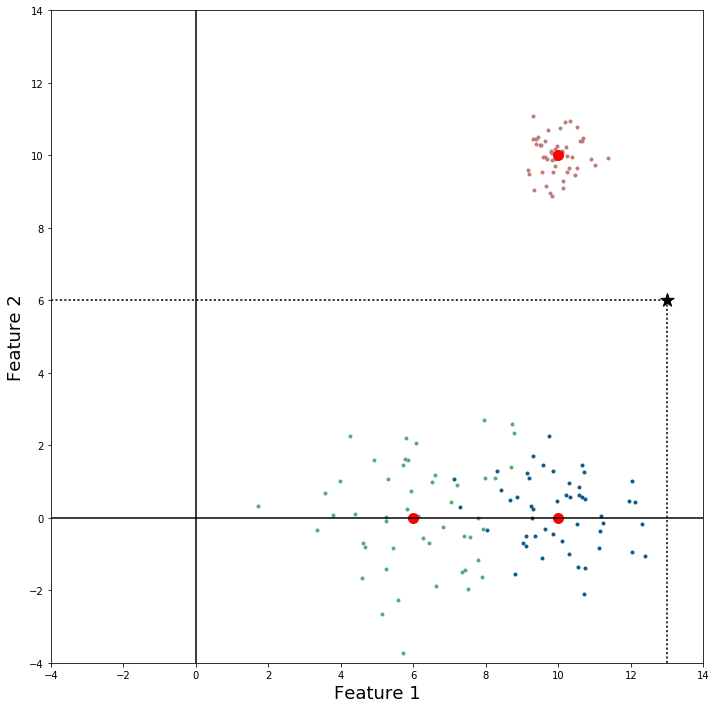

In [6]:
fig, ax1 = plt.subplots(figsize=(16, 12))

ax1.scatter(a[:, 0], a[:, 1], c='#0b5a8a', marker='.')
ax1.scatter(b[:, 0], b[:, 1], c='#59ac7c', marker='.')
ax1.scatter(c[:, 0], c[:, 1], c='#c07b7b', marker='.')
ax1.scatter(13, 6, s=200, marker='*', c='#000000')

ax1.vlines([0], -4, 14, linestyles='solid')
ax1.hlines([0], -4, 14, linestyles='solid')

ax1.vlines([13], -4, 6, linestyles='dotted')
ax1.hlines([6], -4, 13, linestyles='dotted')

ax1.scatter([6, 10, 10], [0, 0, 10], s=100, c='r')

ax1.set_aspect(1)
ax1.set_xlim((-4, 14))
ax1.set_ylim((-4, 14))

ax1.set_xlabel('Feature 1', fontsize=18)
ax1.set_ylabel('Feature 2', fontsize=18)

plt.show()

## Predicted Class ...

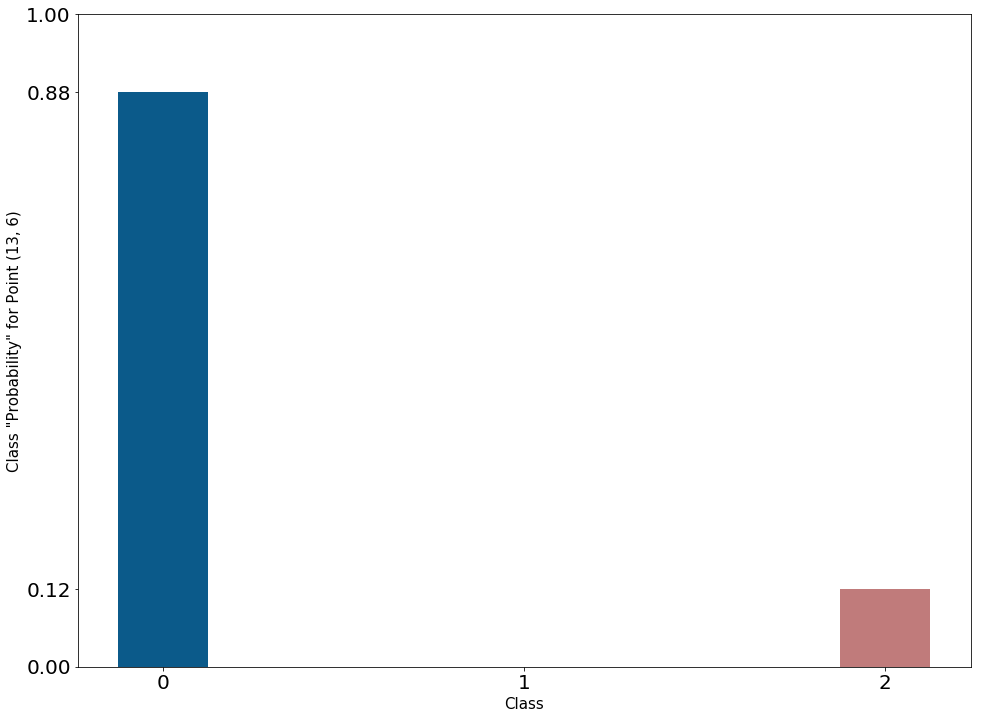

In [7]:
fig, ax = plt.subplots(figsize=(16, 12))

ax.bar([0, 1, 2], clf.predict_proba([[13, 6]]).reshape(-1), width=0.25, color=['#0b5a8a','#59ac7c','#c07b7b'])

ax.set_ylim((0, 1))

plt.xticks([0, 1, 2], fontsize=20)
plt.yticks(list(clf.predict_proba([[13, 6]]).reshape(-1)) + [1.0], fontsize=20)
ax.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.02f'))

ax.set_xlabel('Class', fontsize=15)
ax.set_ylabel('Class "Probability" for Point (13, 6)', fontsize=15)

plt.show()

## A look at the Decision Boundaries

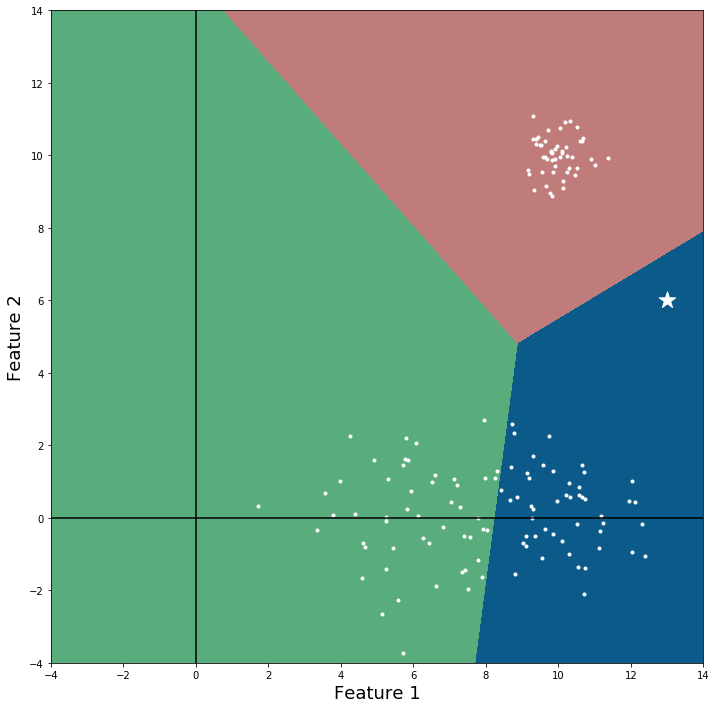

In [8]:
fig, ax2 = plt.subplots(figsize=(16, 12))

contour = ax2.contourf(xx, yy, probs, 25, cmap=mpl.colors.ListedColormap(['#0b5a8a', '#59ac7c', '#c07b7b']),
                      vmin=0, vmax=1)

ax2.vlines([0], -4, 14, linestyles='solid')
ax2.hlines([0], -4, 14, linestyles='solid')

ax2.scatter(a[:, 0], a[:, 1], c='#FFFFFF', marker='.')
ax2.scatter(b[:, 0], b[:, 1], c='#FFFFFF', marker='.')
ax2.scatter(c[:, 0], c[:, 1], c='#FFFFFF', marker='.')
ax2.scatter(13, 6, s=300, marker='*', c='#FFFFFF')


ax2.set_aspect(1)
ax2.set_xlim((-4, 14))
ax2.set_ylim((-4, 14))

ax2.set_xlabel('Feature 1', fontsize=18)
ax2.set_ylabel('Feature 2', fontsize=18)

plt.show()

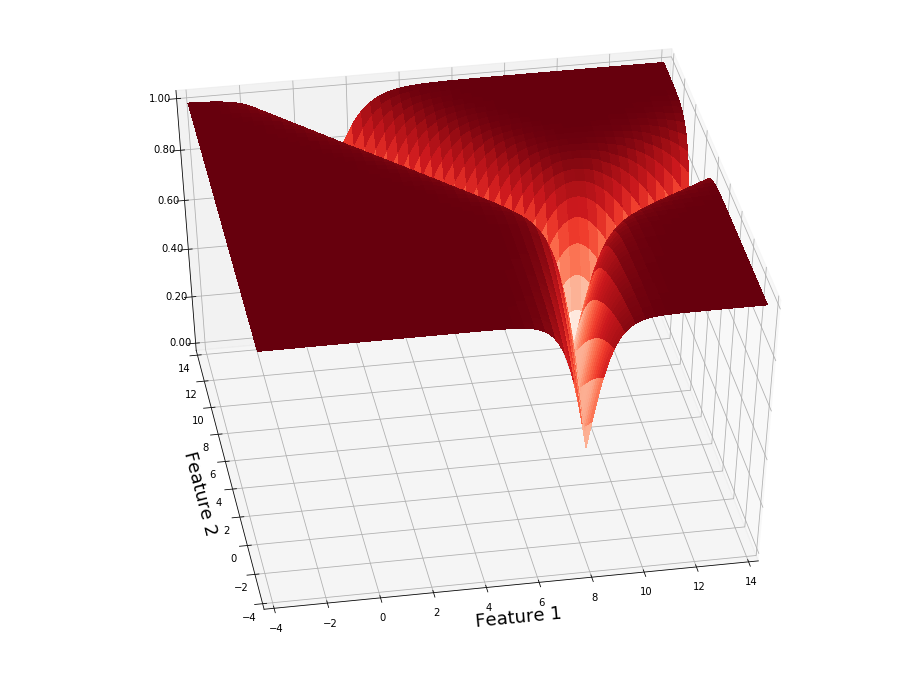

In [9]:
fig = plt.figure(figsize=(16, 12))
ax = fig.gca(projection='3d')

# Plot the surface.
surf = ax.plot_surface(xx, yy, most_prob, 
                       cmap='Reds',
                       linewidth=0, 
                       antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.01, 1.01)
ax.zaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.02f'))

# axes labels
ax.set_xlabel('Feature 1', fontsize=18)
ax.set_ylabel('Feature 2', fontsize=18)

# plot limits
ax.set_xlim((-4, 14))
ax.set_ylim((-4, 14))

# select a nice viewing angle
ax.view_init(azim=260, elev=45)

plt.show()

---

---
## Bayesian Logistic Regression

In [10]:
import tensorflow as tf
import edward as ed
from edward.models import Normal, OneHotCategorical, Multinomial

In [11]:
yy = tf.one_hot(y, 3)

In [12]:
W_0 = Normal(loc=tf.zeros([2, 3]), scale=tf.ones([2, 3]))
b_0 = Normal(loc=tf.zeros(3), scale=tf.ones(3))

x = tf.placeholder(tf.float32, [None, 2])
logits = Normal(loc=tf.matmul(x, W_0) + b_0, scale=3.)
logits = tf.nn.log_softmax(logits)
Y = Multinomial(total_count=6., logits=logits)
# Y = Multinomial(total_count=3., probs=logits)
# Y = tf.nn.softmax(logits)

In [13]:
qW_0 = Normal(loc=tf.get_variable("qW_0/loc", [2, 3]),
              scale=tf.nn.softplus(tf.get_variable("qW_0/scale", [2, 3])))
qb_0 = Normal(loc=tf.get_variable("qb_0/loc", [3]),
              scale=tf.nn.softplus(tf.get_variable("qb_0/scale", [3])))

In [14]:
inference = ed.KLqp({W_0: qW_0, b_0: qb_0}, 
                    data={x: X, Y: yy})
inference.run(n_iter=1000)

1000/1000 [100%] ██████████████████████████████ Elapsed: 1s | Loss: -855.712


In [15]:
# y_post = ed.copy(Y, {W_0: qW_0, b_0: qb_0})
y_post = ed.copy(logits, {W_0: qW_0, b_0: qb_0})

In [16]:
draws = np.array([y_post.eval(feed_dict={x: np.array([[13, 6]])}) for i in range(100)])

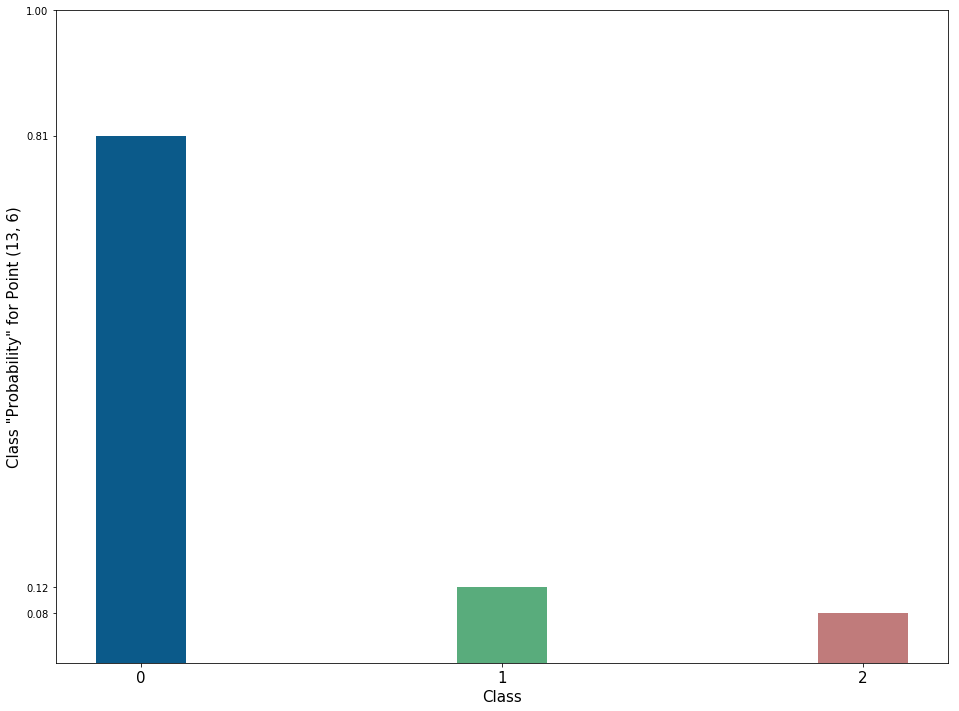

In [17]:
fig, ax = plt.subplots(figsize=(16, 12))

ax.bar([0, 1, 2], np.mean(np.exp(draws.reshape(100, 3)), axis=0), width=0.25, color=['#0b5a8a','#59ac7c','#c07b7b'])

ax.set_ylim((0, 1))

plt.xticks([0, 1, 2], fontsize=15)
plt.yticks(list(np.mean(np.exp(draws.reshape(100, 3)), axis=0)) + [1.0])
ax.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.02f'))

ax.set_xlabel('Class', fontsize=15)
ax.set_ylabel('Class "Probability" for Point (13, 6)', fontsize=15)

plt.show()

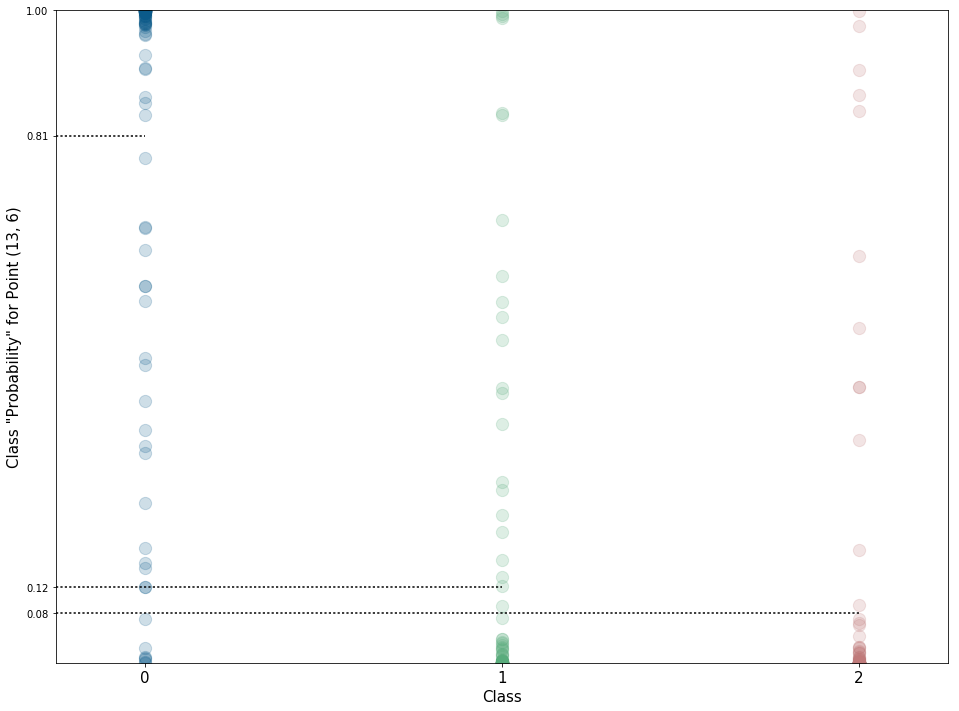

In [84]:
fig, ax = plt.subplots(figsize=(16, 12))
probabilities = np.exp(draws.reshape(100, 3))

ax.scatter(0 * np.ones_like(probabilities[:, 0]), probabilities[:, 0], alpha=0.2, s=150, c='#0b5a8a')
ax.scatter(1 * np.ones_like(probabilities[:, 1]), probabilities[:, 1], alpha=0.2, s=150, c='#59ac7c')
ax.scatter(2 * np.ones_like(probabilities[:, 2]), probabilities[:, 2], alpha=0.2, s=150, c='#c07b7b')

ax.set_ylim((0, 1))
ax.set_xlim((-0.25, 2.25))

ax.hlines(list(np.mean(np.exp(draws.reshape(100, 3)), axis=0)), -0.25, [0, 1, 2], linestyles='dotted')

plt.xticks([0, 1, 2], fontsize=15)
plt.yticks(list(np.mean(np.exp(draws.reshape(100, 3)), axis=0)) + [1.0])
ax.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.02f'))

ax.set_xlabel('Class', fontsize=15)
ax.set_ylabel('Class "Probability" for Point (13, 6)', fontsize=15)

plt.show()

In [85]:
predictive_mean = np.mean(np.exp(draws.reshape(100, 3)), axis=0)
predictive_std = np.std(np.exp(draws.reshape(100, 3)), axis=0)

print('Class 0: mean {:.2f}, stddev {:.2f}'.format(predictive_mean[0], predictive_std[0]))
print('Class 1: mean {:.2f}, stddev {:.2f}'.format(predictive_mean[1], predictive_std[1]))
print('Class 2: mean {:.2f}, stddev {:.2f}'.format(predictive_mean[2], predictive_std[2]))

Class 0: mean 0.81, stddev 0.33
Class 1: mean 0.12, stddev 0.25
Class 2: mean 0.08, stddev 0.22


In [86]:
amax = np.argmax(np.exp(draws.reshape(100, 3)), axis=1)
print('variation-ratio: {:.2f}'.format(1 - len(amax[amax == 0])/100))

variation-ratio: 0.19


In [87]:
m = np.mean(np.exp(draws.reshape(100, 3)), axis=0)
print('predictive entropy: {:.2f}'.format(-np.sum(m * np.log(m))))

predictive entropy: 0.62


In [88]:
mi = np.exp(draws.reshape(100, 3)) * np.log(np.exp(draws.reshape(100, 3)))
mi = -np.sum(m * np.log(m)) + np.sum(mi)/100
print('mutual information: {:.2f}'.format(mi))

mutual information: 0.43


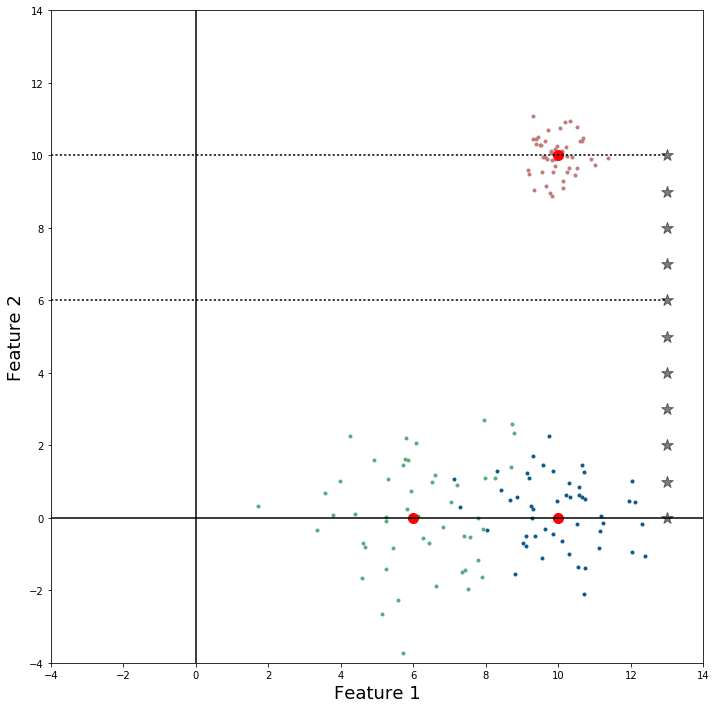

In [89]:
fig, ax1 = plt.subplots(figsize=(16, 12))

ax1.scatter(a[:, 0], a[:, 1], c='#0b5a8a', marker='.')
ax1.scatter(b[:, 0], b[:, 1], c='#59ac7c', marker='.')
ax1.scatter(c[:, 0], c[:, 1], c='#c07b7b', marker='.')
ax1.scatter([13]*11, range(0, 11), s=150, marker='*', c='#000000', alpha=0.5)

ax1.vlines([0], -4, 14, linestyles='solid')
ax1.hlines([0], -4, 14, linestyles='solid')

# ax1.vlines([13], -4, 6, linestyles='dotted')
ax1.hlines([6, 10], -4, 13, linestyles='dotted')

ax1.scatter([6, 10, 10], [0, 0, 10], s=100, c='r')

ax1.set_aspect(1)
ax1.set_xlim((-4, 14))
ax1.set_ylim((-4, 14))

ax1.set_xlabel('Feature 1', fontsize=18)
ax1.set_ylabel('Feature 2', fontsize=18)

plt.show()

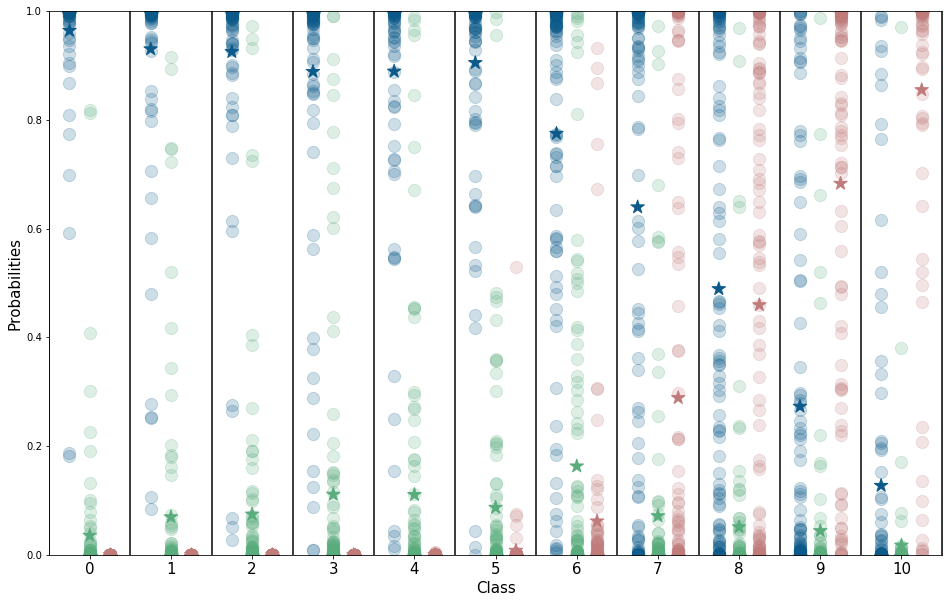

In [83]:
fig, ax = plt.subplots(figsize=(16, 10))
probabilities = np.exp(draws.reshape(100, 3))

for j in range(11):
    probabilities = np.exp(np.array([y_post.eval(feed_dict={x: np.array([[13, j]])}) for i in range(100)]).reshape(100, 3))
    ax.scatter((j - 0.25) * np.ones_like(probabilities[:, 0]), probabilities[:, 0], alpha=0.2, s=150, c='#0b5a8a')
    ax.scatter((j) * np.ones_like(probabilities[:, 1]), probabilities[:, 1], alpha=0.2, s=150, c='#59ac7c')
    ax.scatter((j + 0.25) * np.ones_like(probabilities[:, 2]), probabilities[:, 2], alpha=0.2, s=150, c='#c07b7b')
    ax.scatter([j - 0.25, j, j + 0.25], np.mean(probabilities, axis=0), marker='*', s=200, c=['#0b5a8a', '#59ac7c', '#c07b7b'])

ax.set_ylim((0, 1))
ax.set_xlim((-0.5, 10.5))

ax.vlines(np.arange(-0.5, 11.5), 0, 1, linestyles='solid')

plt.xticks(range(11), fontsize=15)
# plt.yticks(list(np.mean(np.exp(draws.reshape(100, 3)), axis=0)) + [1.0])
# ax.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.02f'))

ax.set_xlabel('Class', fontsize=15)
ax.set_ylabel('Probabilities', fontsize=15)

plt.show()